# ExamMachineLearning_Soufiane_Jaida V2

# I. Load The Data

# I.1 Import the libraries needed

In [1]:
import warnings
warnings.filterwarnings('ignore')
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from numpy import set_printoptions
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from joblib import dump
from joblib import load
from sklearn.metrics import confusion_matrix


# I.2 Load Dataset

In [2]:
# Load dataset
filename = 'lung-cancer.data.csv'
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'] #16Attributs
dataset = read_csv(filename, header=None)

# II. Summarizing the Data

# II.1 Dimensions of Dataset

In [3]:
# shape
print(dataset.shape)

(32, 57)


# II.2 Peek at the Data

In [4]:
# head
print(dataset.head(5))
# tail
print(dataset.tail(5))

   0   1   2   3  4   5   6   7   8   9   ...  47  48  49  50  51  52  53  54  \
0   1   0   3   0  ?   0   2   2   2   1  ...   2   2   2   2   2   1   1   1   
1   1   0   3   3  1   0   3   1   3   1  ...   2   2   2   2   2   2   2   1   
2   1   0   3   3  2   0   3   3   3   1  ...   2   2   2   2   2   2   2   2   
3   1   0   2   3  2   1   3   3   3   1  ...   2   2   2   2   2   2   2   2   
4   1   0   3   2  1   1   3   3   3   2  ...   2   2   2   2   2   2   2   1   

   55  56  
0   2   2  
1   2   2  
2   1   2  
3   2   2  
4   2   2  

[5 rows x 57 columns]
    0   1   2   3  4   5   6   7   8   9   ...  47  48  49  50  51  52  53  \
27   3   0   2   2  1   0   2   2   2   1  ...   3   3   2   2   3   2   2   
28   3   0   3   2  2   0   2   2   2   1  ...   2   2   2   3   1   2   2   
29   3   0   2   1  1   0   2   2   1   1  ...   2   2   3   2   2   2   2   
30   3   0   2   3  2   1   2   2   3   1  ...   2   2   2   2   2   2   2   
31   3   0   2   3  1   0   

# II.3 Statistical Summary of all attributes

In [5]:
# descriptions
print(dataset.describe())

              0          1          2          3          5          6   \
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    2.031250   0.031250   2.375000   2.031250   0.281250   2.187500   
std     0.782237   0.176777   0.553581   1.031265   0.456803   0.737804   
min     1.000000   0.000000   1.000000   0.000000   0.000000   1.000000   
25%     1.000000   0.000000   2.000000   1.750000   0.000000   2.000000   
50%     2.000000   0.000000   2.000000   2.000000   0.000000   2.000000   
75%     3.000000   0.000000   3.000000   3.000000   1.000000   3.000000   
max     3.000000   1.000000   3.000000   3.000000   1.000000   3.000000   

              7          8          9          10  ...         47         48  \
count  32.000000  32.000000  32.000000  32.000000  ...  32.000000  32.000000   
mean    2.125000   2.406250   1.156250   1.406250  ...   2.062500   2.062500   
std     0.751343   0.756024   0.514899   0.559918  ...   0.245935   0.245935   
min 

# III. Data Visualization

# III.1 Univariate

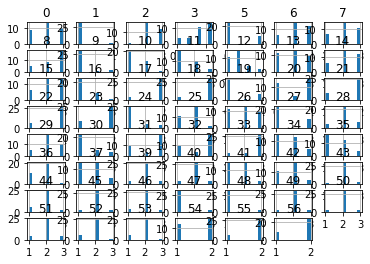

In [6]:
# histograms
dataset.hist()
pyplot.show()

# III.2 Multivariate

In [ ]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# III.3 Correlation

In [7]:
print("List 4 Highest Correlation Pairs")
k = dataset.corr().unstack().sort_values(ascending = False).drop_duplicates()
print(k)

List 4 Highest Correlation Pairs
56  56    1.000000
52  53    0.839196
56  8     0.715137
20  0     0.681500
15  14    0.680720
            ...   
0   14   -0.569412
20  14   -0.570652
6   20   -0.616077
20  8    -0.674652
51  50   -0.707107
Length: 1179, dtype: float64


# IV.Prapare Data

# IV.1 Data Cleaning - Fixing broken data

In [8]:
df = dataset.replace({None:np.nan,'?': np.nan})

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,NaN,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
5,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
6,1,0,3,2,1,0,3,3,3,1,...,2,2,2,2,1,2,2,2,1,2
7,1,0,2,2,1,0,3,1,3,3,...,2,2,1,2,2,2,2,1,2,2
8,1,0,3,1,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
9,2,0,2,3,2,0,2,2,2,1,...,2,2,2,1,3,2,1,1,2,2


# IV.2 Linear interpolation

In [10]:
df = df.interpolate(method='linear', limit_direction='forward', axis=0)

# IV.3 Imputation - Filling the broken data with values

In [11]:
df = df.copy()
df = df.fillna(method='bfill')

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,1,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
5,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
6,1,0,3,2,1,0,3,3,3,1,...,2,2,2,2,1,2,2,2,1,2
7,1,0,2,2,1,0,3,1,3,3,...,2,2,1,2,2,2,2,1,2,2
8,1,0,3,1,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
9,2,0,2,3,2,0,2,2,2,1,...,2,2,2,1,3,2,1,1,2,2


# IV.4 Feature Selection  
    

In [13]:
datasetT = read_csv(filename, names=names)
df = datasetT.values
# Separate array into input and output components
X = df [: , 1:57] # input
Y = df [: , : 1] # output

In [14]:
print("Original Dataset\n--------------")
print(X, "\n")
# Feature selection
pca = PCA(n_components=3)
fit = pca.fit(X)
# Summarize compoments
#print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)
x = np.array(fit.components_)
print(x.shape)

Original Dataset
--------------
[[2 2 2 2 2 2 2 2 2 2 1 1 1 2 2]
 [1 2 2 1 2 2 2 2 2 2 2 2 1 2 2]
 [2 2 1 2 2 2 2 2 2 2 2 2 2 1 2]
 [1 2 2 2 1 2 2 2 2 2 2 2 2 2 2]
 [1 2 2 2 2 2 2 2 2 2 2 2 1 2 2]
 [1 2 2 2 2 2 2 2 2 2 2 2 2 1 2]
 [2 2 2 2 1 2 2 2 2 1 2 2 2 1 2]
 [2 2 2 1 2 2 2 1 2 2 2 2 1 2 2]
 [2 2 1 2 2 2 2 2 2 2 2 2 1 2 2]
 [2 2 2 2 2 2 2 2 1 3 2 1 1 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [1 2 2 2 2 2 2 2 2 2 1 1 2 2 1]
 [2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]
 [1 2 2 1 2 2 2 2 2 2 1 1 1 2 2]
 [1 2 2 2 2 2 2 2 2 2 2 2 1 2 1]
 [2 2 1 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]
 [1 2 1 2 2 2 2 2 2 2 1 1 1 2 2]
 [3 2 2 2 2 2 2 2 2 2 2 2 2 1 2]
 [1 2 2 2 2 2 2 2 2 2 1 1 2 2 1]
 [2 2 1 2 2 2 2 2 2 1 2 2 1 2 2]
 [2 2 2 2 2 2 2 1 2 2 2 2 2 1 2]
 [3 3 3 3 3 3 3 3 3 1 3 3 2 2 1]
 [2 3 2 2 2 2 2 2 2 2 2 2 2 2 1]
 [2 2 2 2 2 2 2 2 2 3 2 2 2 2 1]
 [1 2 2 2 1 2 2 2 1 3 1 2 2 1 2]
 [1 1 2 2 1 2 2 2 2 2 2 2 1 2 1]
 [3 2 2 2 3 3 3 2 2 3 2 2 2 2 1]
 [2 3 2 2 2 2 2 2 3 1 2 2 2 2 2]
 [2 2 3 3 2

In [16]:
validation_size = 0.33
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# IV.5 Rescale

In [17]:
#Without Rescale 
set_printoptions(precision=3)
print(X)

[[2 2 2 2 2 2 2 2 2 2 1 1 1 2 2]
 [1 2 2 1 2 2 2 2 2 2 2 2 1 2 2]
 [2 2 1 2 2 2 2 2 2 2 2 2 2 1 2]
 [1 2 2 2 1 2 2 2 2 2 2 2 2 2 2]
 [1 2 2 2 2 2 2 2 2 2 2 2 1 2 2]
 [1 2 2 2 2 2 2 2 2 2 2 2 2 1 2]
 [2 2 2 2 1 2 2 2 2 1 2 2 2 1 2]
 [2 2 2 1 2 2 2 1 2 2 2 2 1 2 2]
 [2 2 1 2 2 2 2 2 2 2 2 2 1 2 2]
 [2 2 2 2 2 2 2 2 1 3 2 1 1 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [1 2 2 2 2 2 2 2 2 2 1 1 2 2 1]
 [2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]
 [1 2 2 1 2 2 2 2 2 2 1 1 1 2 2]
 [1 2 2 2 2 2 2 2 2 2 2 2 1 2 1]
 [2 2 1 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]
 [1 2 1 2 2 2 2 2 2 2 1 1 1 2 2]
 [3 2 2 2 2 2 2 2 2 2 2 2 2 1 2]
 [1 2 2 2 2 2 2 2 2 2 1 1 2 2 1]
 [2 2 1 2 2 2 2 2 2 1 2 2 1 2 2]
 [2 2 2 2 2 2 2 1 2 2 2 2 2 1 2]
 [3 3 3 3 3 3 3 3 3 1 3 3 2 2 1]
 [2 3 2 2 2 2 2 2 2 2 2 2 2 2 1]
 [2 2 2 2 2 2 2 2 2 3 2 2 2 2 1]
 [1 2 2 2 1 2 2 2 1 3 1 2 2 1 2]
 [1 1 2 2 1 2 2 2 2 2 2 2 1 2 1]
 [3 2 2 2 3 3 3 2 2 3 2 2 2 2 1]
 [2 3 2 2 2 2 2 2 3 1 2 2 2 2 2]
 [2 2 3 3 2 2 2 3 2 2 2 2 2 2 1]
 [2 2 2 2 

In [18]:
#rescale data between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(X)
#Summarize transform data
set_printoptions(precision = 3)
print(rescaledX)

[[0.5 0.5 0.5 0.5 0.5 0.  0.  0.5 0.5 0.5 0.  0.  0.  1.  1. ]
 [0.  0.5 0.5 0.  0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 0.  1.  1. ]
 [0.5 0.5 0.  0.5 0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 1.  0.  1. ]
 [0.  0.5 0.5 0.5 0.  0.  0.  0.5 0.5 0.5 0.5 0.5 1.  1.  1. ]
 [0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 0.  1.  1. ]
 [0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 1.  0.  1. ]
 [0.5 0.5 0.5 0.5 0.  0.  0.  0.5 0.5 0.  0.5 0.5 1.  0.  1. ]
 [0.5 0.5 0.5 0.  0.5 0.  0.  0.  0.5 0.5 0.5 0.5 0.  1.  1. ]
 [0.5 0.5 0.  0.5 0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 0.  1.  1. ]
 [0.5 0.5 0.5 0.5 0.5 0.  0.  0.5 0.  1.  0.5 0.  0.  1.  1. ]
 [0.5 0.5 0.5 0.5 0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 1.  1.  1. ]
 [0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.5 0.5 0.  0.  1.  1.  0. ]
 [0.5 0.5 0.5 0.5 0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 0.  1.  1. ]
 [0.  0.5 0.5 0.  0.5 0.  0.  0.5 0.5 0.5 0.  0.  0.  1.  1. ]
 [0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 0.  1.  0. ]
 [0.5 0.5 0.  0.5 0.5 0.  0.  0.5 0.5 0.5 0.5 0.5 1.  1

# IV.6 Standarize

In [19]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
#Summarize transform data
set_printoptions(precision = 3)
print(rescaledX)

[[ 0.408 -0.18   0.258  0.079  0.146 -0.258 -0.258  0.     0.     0.
  -1.914 -1.914 -1.134  0.48   0.626]
 [-1.225 -0.18   0.258 -2.458  0.146 -0.258 -0.258  0.     0.     0.
   0.354  0.354 -1.134  0.48   0.626]
 [ 0.408 -0.18  -1.807  0.079  0.146 -0.258 -0.258  0.     0.     0.
   0.354  0.354  0.882 -2.082  0.626]
 [-1.225 -0.18   0.258  0.079 -2.188 -0.258 -0.258  0.     0.     0.
   0.354  0.354  0.882  0.48   0.626]
 [-1.225 -0.18   0.258  0.079  0.146 -0.258 -0.258  0.     0.     0.
   0.354  0.354 -1.134  0.48   0.626]
 [-1.225 -0.18   0.258  0.079  0.146 -0.258 -0.258  0.     0.     0.
   0.354  0.354  0.882 -2.082  0.626]
 [ 0.408 -0.18   0.258  0.079 -2.188 -0.258 -0.258  0.     0.    -2.
   0.354  0.354  0.882 -2.082  0.626]
 [ 0.408 -0.18   0.258 -2.458  0.146 -0.258 -0.258 -2.828  0.     0.
   0.354  0.354 -1.134  0.48   0.626]
 [ 0.408 -0.18  -1.807  0.079  0.146 -0.258 -0.258  0.     0.     0.
   0.354  0.354 -1.134  0.48   0.626]
 [ 0.408 -0.18   0.258  0.079  0.146 

# V.Evaluate Algorithmes

# V.1 Test harness

In [20]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.510000 (0.235372)
LDA: 0.560000 (0.198494)
KNN: 0.560000 (0.198494)
CART: 0.760000 (0.159374)
NB: 0.530000 (0.196469)
SVM: 0.560000 (0.198494)


# V.2 Compare the algorithms

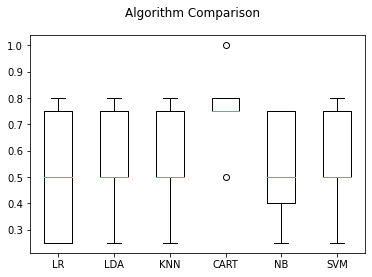

In [21]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# V.3 Making prediction

In [22]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7272727272727273
[[4 0]
 [3 4]]
              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       1.00      0.57      0.73         7

    accuracy                           0.73        11
   macro avg       0.79      0.79      0.73        11
weighted avg       0.84      0.73      0.73        11



In [23]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
num_folds = 10
seed = 7
scoring = 'accuracy'
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.550000 (0.269258)
ScaledLDA: 0.700000 (0.331662)
ScaledKNN: 0.450000 (0.350000)
ScaledCART: 0.650000 (0.320156)
ScaledNB: 0.416667 (0.381881)
ScaledSVM: 0.550000 (0.269258)


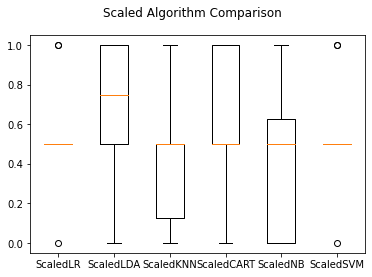

In [24]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# V.4 Tuning KNN

In [25]:
# Tune scaled KNN
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.600000 using {'n_neighbors': 3}
0.550000 (0.350000) with: {'n_neighbors': 1}
0.600000 (0.200000) with: {'n_neighbors': 3}
0.450000 (0.350000) with: {'n_neighbors': 5}
0.550000 (0.350000) with: {'n_neighbors': 7}
0.516667 (0.320156) with: {'n_neighbors': 9}
0.466667 (0.355903) with: {'n_neighbors': 11}
0.383333 (0.298608) with: {'n_neighbors': 13}
0.366667 (0.244949) with: {'n_neighbors': 15}
0.516667 (0.320156) with: {'n_neighbors': 17}


AB: 0.650000 (0.229129)
GBM: 0.700000 (0.331662)
RF: 0.550000 (0.269258)
ET: 0.650000 (0.229129)


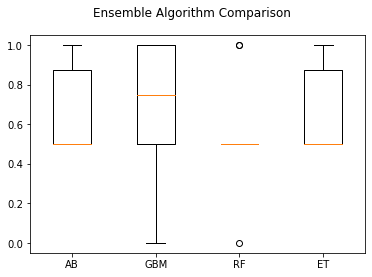

In [26]:
# ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# VI Finalize the Model

In [27]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2.0, kernel='linear')
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5454545454545454
[[2 2]
 [3 4]]
              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       0.67      0.57      0.62         7

    accuracy                           0.55        11
   macro avg       0.53      0.54      0.53        11
weighted avg       0.57      0.55      0.55        11



# With Joblib

In [28]:
datasetT = read_csv(filename, names=names)
df = datasetT.values
# Separate array into input and output components
X = df [: , 1:57] # input
Y = df [: , : 1] # output
# Seed
seed = 7
test_size = 0.33
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state=seed)
model = LogisticRegression()
# Fit model for training
model.fit(X_train, Y_train)
# Save the model to disk
filename = 'finalized_Model.sav'
dump(model, filename)

['finalized_Exam_Model.sav']

In [29]:
# Load model from disk
loaded_model = load(filename)
# Make the prediction
predicted = loaded_model.predict(X_test)
# Confusion matrix
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
TP = matrix[1,1]
FP = matrix[0,1] #matrix[0][1]
TN = matrix[0,0]
FN = matrix[1,0]
print("True positive:", TP)
print("False positive:", FP)
print("True Negative:", TN)
print("True Negative:", FN)
accuracy = (TP + TN)/ (TP+FP+TN+FN)
print("Accuracy: ", accuracy*100)
sensitivity = TP / (TP + FN)
print("Sensitivity: ", sensitivity*100)
specificity = TN / (TN + FP)
print("specificity: ", specificity*100)
precision = TP / (TP + FP)
print("Precision: ", precision*100)
f1 = 2 *(1/((1/precision) + (1/sensitivity)))
print("F1: ", f1*100)

[[0 3]
 [0 8]]
True positive: 8
False positive: 3
True Negative: 0
True Negative: 0
Accuracy:  72.72727272727273
Sensitivity:  100.0
specificity:  0.0
Precision:  72.72727272727273
F1:  84.21052631578947
